### 'Import' Block
*this cell will be used to store imported libraries and packages.

In [1]:
from itertools import groupby

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from openpyxl.styles.builtins import title

### importing the first data frame "Appointments Duration" and doing sense-check

In [2]:
appts_duration = pd.read_csv('actual_duration.csv')
appts_duration.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
appts_duration.shape

(137793, 8)

In [4]:
appts_duration.dtypes

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [5]:
#check if there are missing values
appts_duration.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [6]:
# adding appointment_month column for consistent date format
appts_duration['appointment_month'] = pd.to_datetime(appts_duration['appointment_date']).dt.to_period('M')
appts_duration.head()

C:\Users\Dima_B\AppData\Local\Temp\ipykernel_34784\3449883721.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  appts_duration['appointment_month'] = pd.to_datetime(appts_duration['appointment_date']).dt.to_period('M')


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_month
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364,2021-12
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619,2021-12
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698,2021-12
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277,2021-12
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730,2021-12


In [7]:
appts_duration.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
appointment_month            0
dtype: int64

In [8]:
appts_duration.dtypes

sub_icb_location_code           object
sub_icb_location_ons_code       object
sub_icb_location_name           object
icb_ons_code                    object
region_ons_code                 object
appointment_date                object
actual_duration                 object
count_of_appointments            int64
appointment_month            period[M]
dtype: object

### importing the second data frame "Appointments Regional" and doing sense-check

In [9]:
appts_regional = pd.read_csv('appointments_regional.csv')
appts_regional.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [10]:
appts_regional.shape

(596821, 7)

In [11]:
appts_regional[appts_regional['appointment_month'].isna()]


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments


In [12]:
appts_regional.dtypes

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

In [13]:
#check if there are missing values
appts_regional.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [14]:
appts_regional.shape

(596821, 7)

### importing the third data frame "National Categories" and doing sense-check

In [15]:
categories = pd.read_excel('national_categories.xlsx')
categories.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [16]:
categories.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [17]:
categories.shape

(817394, 8)

In [18]:
categories.isna().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

## Overview Section

#### Let's start with describing general things as they are.
We will check
* Number of service settings
* Number of context types
* number of national categories
* appointment statuses
* the total number of all appointments per location using *icb_ons code* and "National_category.xlsx" dataset. I will count ICBs, not GP practices, because ICB is the main unit that is used by NHS for budget and resource planning.

In [19]:
#Count how many ICBs are there in the dataset.
icb_count = len(categories['icb_ons_code'].value_counts())
print(f'Total number of Integrated Care Boards: {icb_count}')

Total number of Integrated Care Boards: 42


In [20]:
#Count the number of service settings
context_count = len(categories['context_type'].value_counts())
print(f'Total number of Contex Types: {context_count}')
print(f'They are: \n {categories['context_type'].unique()}')

Total number of Contex Types: 3
They are: 
 ['Care Related Encounter' 'Unmapped' 'Inconsistent Mapping']


In [21]:
service_settings_count = len(categories['service_setting'].value_counts())
print(f'Total number of Service Settings: {service_settings_count}')
print(f'They are: \n {categories['service_setting'].unique()}')

Total number of Service Settings: 5
They are: 
 ['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision']


In [22]:
#number of national categories
nat_cat_count = len(categories['national_category'].value_counts())
print(f'Total number of National Categories: {nat_cat_count}')
print(f"They are: \n {categories['national_category'].unique()}")

Total number of National Categories: 18
They are: 
 ['Patient contact during Care Home Round' 'Planned Clinics' 'Home Visit'
 'General Consultation Acute' 'Structured Medication Review'
 'Care Home Visit' 'Unmapped' 'Clinical Triage'
 'Planned Clinical Procedure' 'Inconsistent Mapping'
 'Care Home Needs Assessment & Personalised Care and Support Planning'
 'General Consultation Routine'
 'Service provided by organisation external to the practice'
 'Unplanned Clinical Activity' 'Social Prescribing Service'
 'Non-contractual chargeable work'
 'Group Consultation and Group Education' 'Walk-in']


In [23]:
#count of appointment statuses in dataset
appt_status_count = len(appts_regional['appointment_status'].value_counts())
print(f'Total number of Appointment Statuses: {appt_status_count}')
print(f"They are: \n {appts_regional['appointment_status'].unique()}")

Total number of Appointment Statuses: 3
They are: 
 ['Attended' 'DNA' 'Unknown']


Let's calculate the total amount of appointment records per ICB and build the visualisation to the distribution of appointments.

In [24]:
# count all the appointments records per care board from the "National_category" dataset.
appts_per_icb = categories.groupby('icb_ons_code')['count_of_appointments'].sum()
appts_per_icb

icb_ons_code
E54000008    13250311
E54000010     5325790
E54000011     2568487
E54000013     4253394
E54000015     6242530
E54000018     4863552
E54000019     4700180
E54000022     6074027
E54000023     5335653
E54000024     4838515
E54000025     7059966
E54000026     5630586
E54000027    12142390
E54000028     6747958
E54000029     9588891
E54000030     7850170
E54000031     7155030
E54000032     9286167
E54000034     3754540
E54000036     3697369
E54000037     7447758
E54000038     3079318
E54000039     4899508
E54000040     5242176
E54000041     4340449
E54000042     9210625
E54000043     3663418
E54000044     8924264
E54000048     8757248
E54000050    16882235
E54000051     9125945
E54000052     4898540
E54000053     8929398
E54000054    14358371
E54000055     6383746
E54000056     5116300
E54000057    13857900
E54000058     5795343
E54000059     3922181
E54000060     6263489
E54000061     7549415
E54000062     7033637
Name: count_of_appointments, dtype: int64

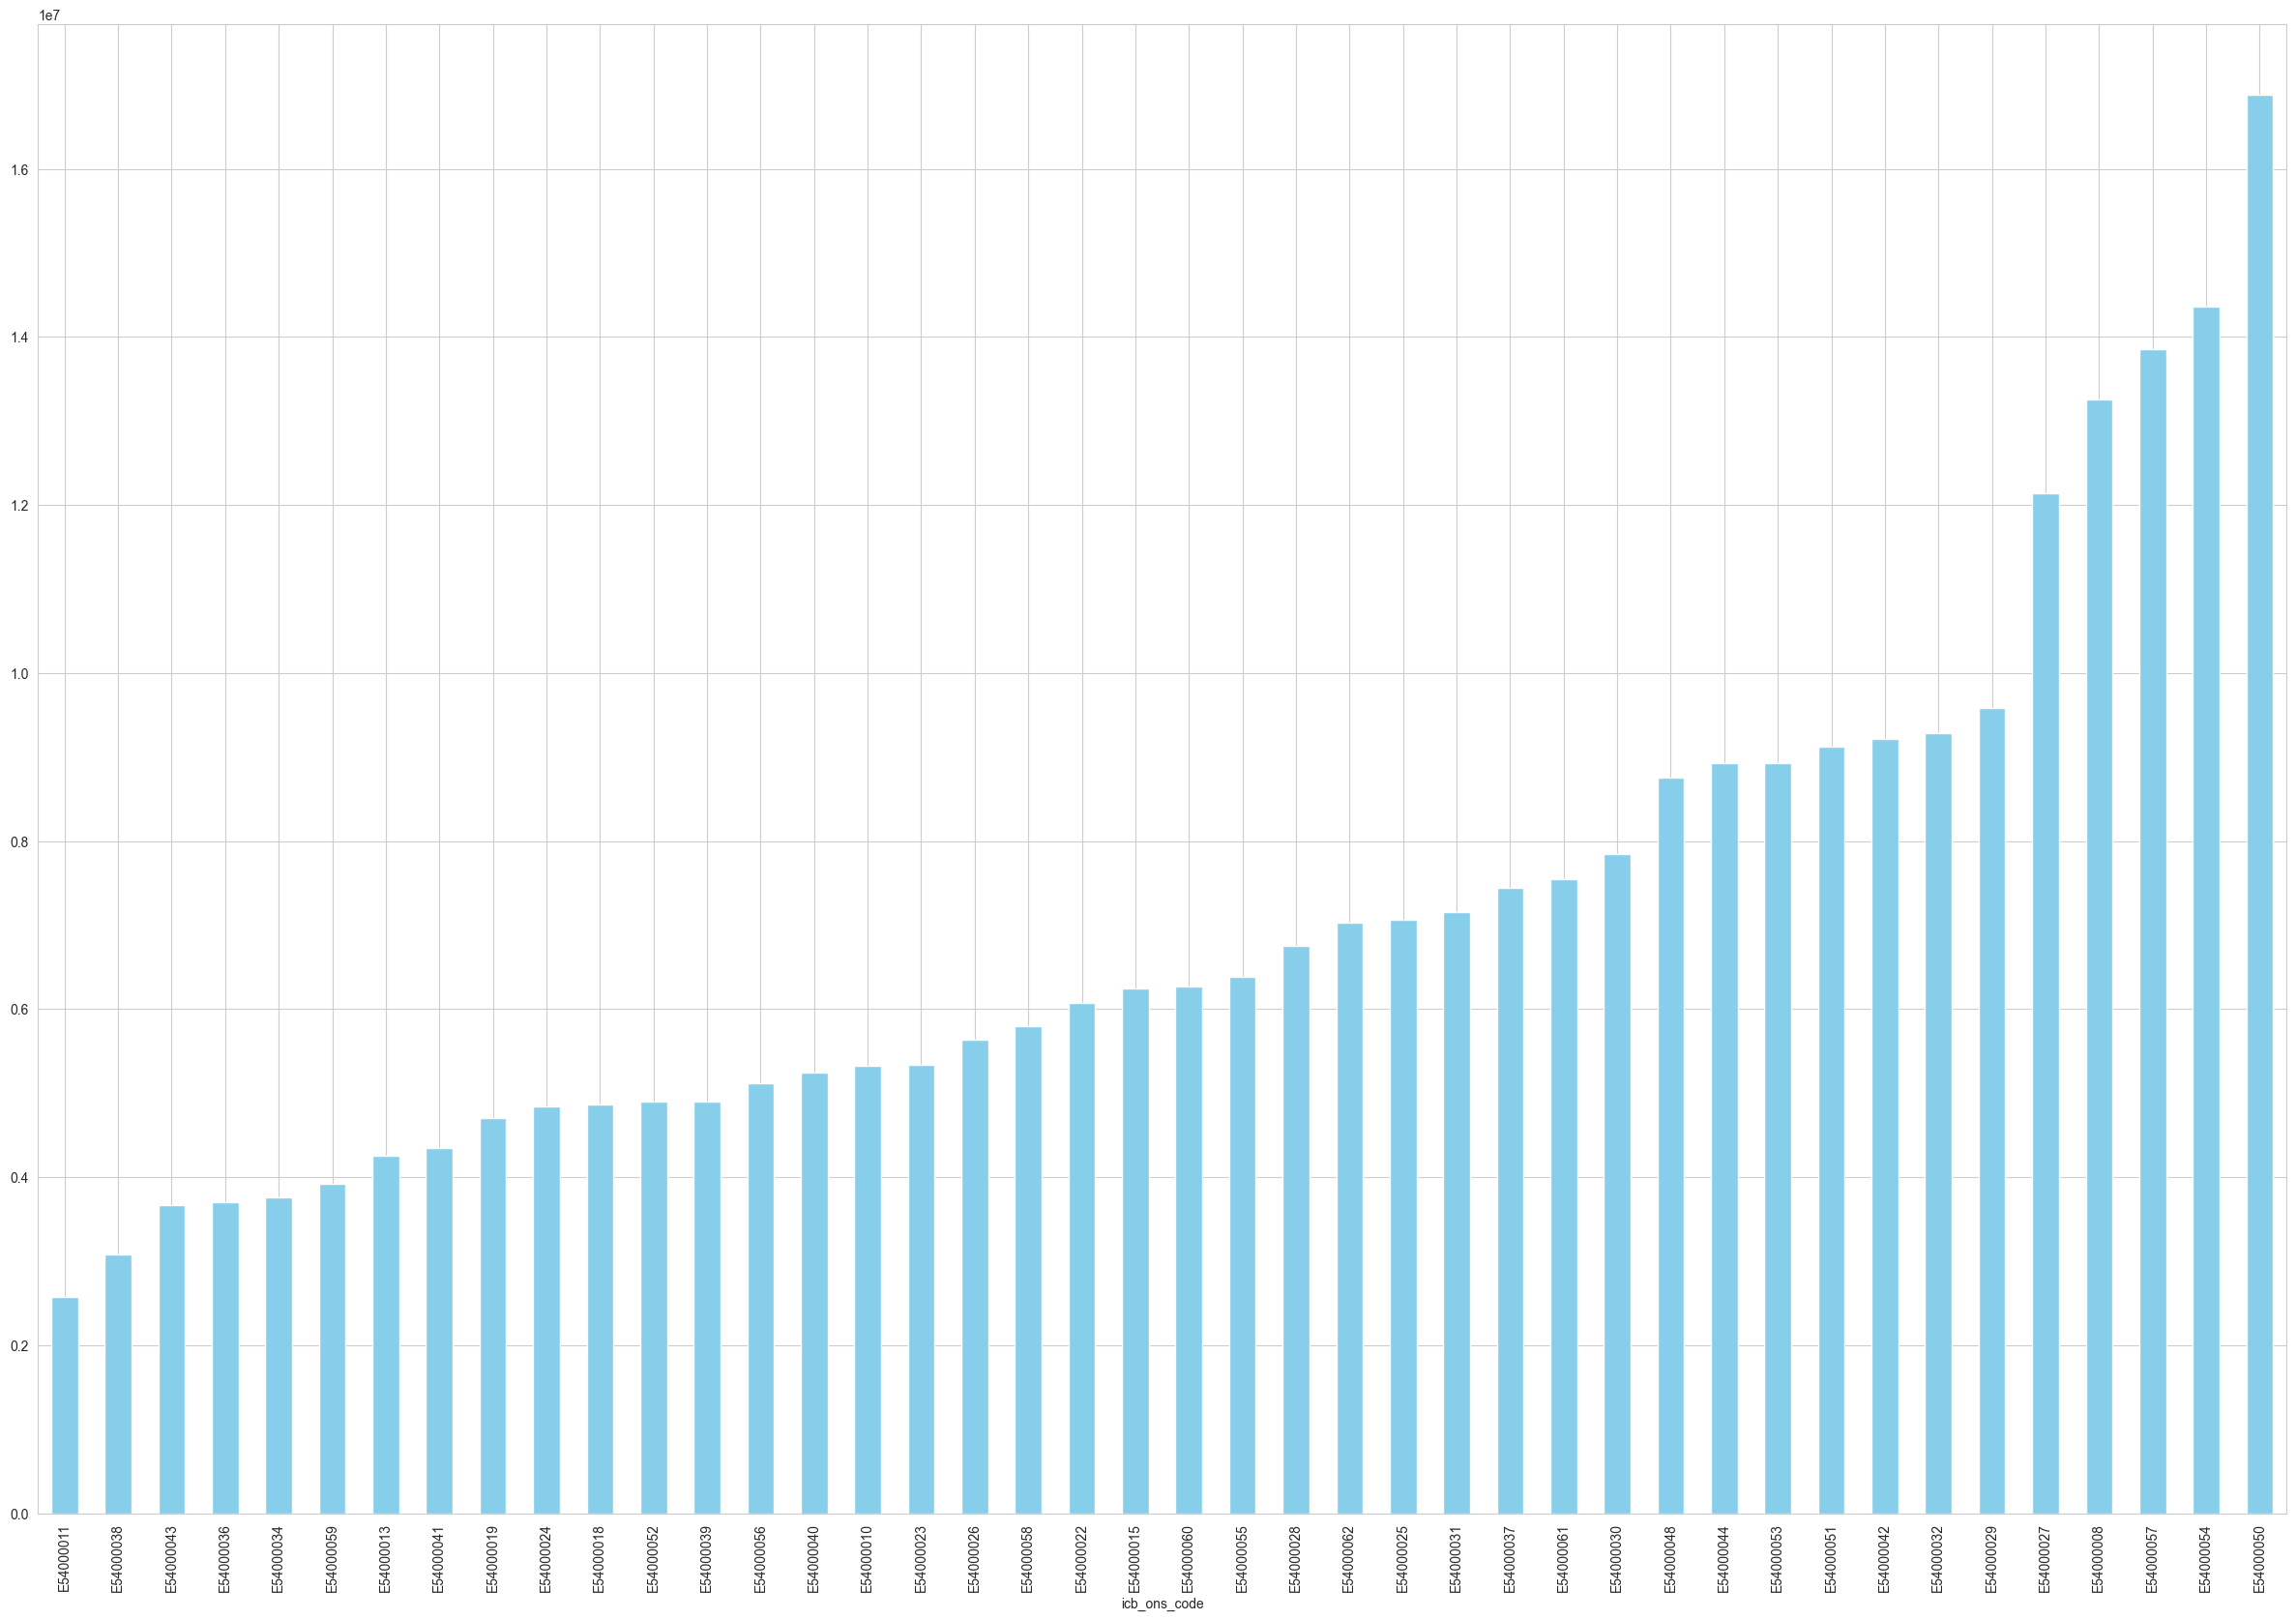

In [25]:
appts_per_icb.sort_values().plot(kind='bar', figsize=(30,20), color='skyblue')
plt.title = 'Number of appointments per Integrated Care Board'
plt.xlabel = 'Count of Appointments'
plt.ylabel = 'ICB Code'
plt.show()


In [26]:
#Top 5 ICBs with the highest number of record count
print(f'Top 5 ICBs with the highest number of records are :\n {appts_per_icb.sort_values(ascending=False).head(5)}')

Top 5 ICBs with the highest number of records are :
 icb_ons_code
E54000050    16882235
E54000054    14358371
E54000057    13857900
E54000008    13250311
E54000027    12142390
Name: count_of_appointments, dtype: int64


### Let's see how many appointments were missed based on "Appointments_regional.csv" set. We'll use *appointment_status*.
Missed appointments are claimed to be one of the main reasons of NHS budget losses and long waiting queues.
Let's investigate how many appointments were missed and calculate the potential losses caused by it.
According to HNS Fourth Valley, the cost of a missed appointment varies from £177 for GP appointment to £97 for nurse-led and £63 for Other Practice Staff respectively. Since we don't have detailed description, we will combine Other Practice Staff and Unknown together and use mean value of (97+63)/2 = £80.

C:\Users\Dima_B\AppData\Local\Temp\ipykernel_34784\1225209727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=appts_regional['appointment_status'], data=appts_regional, palette='Set3')


<Axes: xlabel='appointment_status', ylabel='count'>

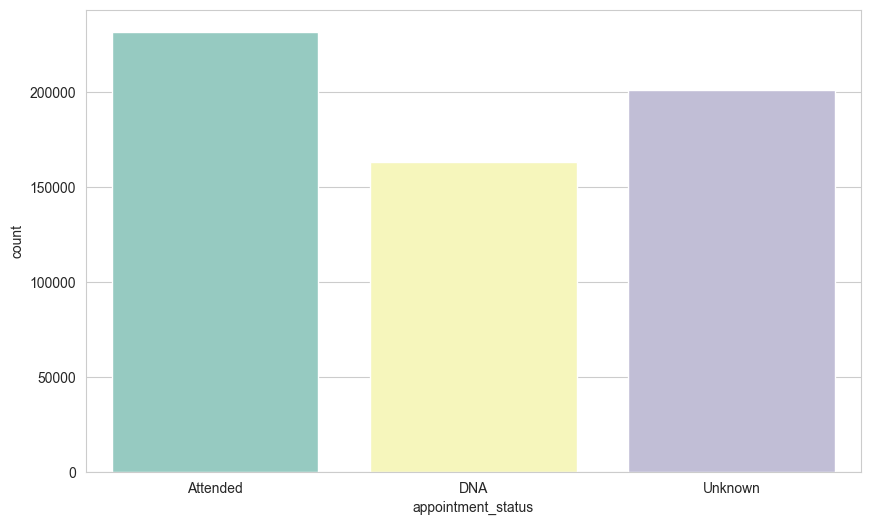

In [27]:
  # let's check the overall picture of the appointment statuses
plt.figure(figsize=(10,6))
sns.countplot(x=appts_regional['appointment_status'], data=appts_regional, palette='Set3')

We can see here that the number of appointments with 'Unknown" status is almost equal, so we can't say exactly whether these appointments were in "Booked", "Attended" or any other status.
Considering significant amount of the appointment with "Unknown" status, I would recommend to revise the reporting mechanism for more precise data collection.

In [28]:
#count the number of missed GP appointments
missed_gp_appts = ((appts_regional['appointment_status'] == 'DNA') & (appts_regional['hcp_type']=='GP')).sum()
print(f"Number of missed appointments with GP: {missed_gp_appts}")

Number of missed appointments with GP: 62788


In [29]:
#calculating missed appointments for other medical staff, including 'Unknown'
other_missed_appts = ((appts_regional['appointment_status'] == 'DNA') & ((appts_regional['hcp_type'] == 'Other Practice staff') |(appts_regional['hcp_type'] == 'Unknown'))).sum()
print(f"Number of missed appointments with Other Practice Staff: {other_missed_appts}")

Number of missed appointments with Other Practice Staff: 100572


In [30]:
#let's calculate the losses due to the missed appointments.

#let's set costs as constants
MISSED_GP_COST = 177
OTHER_MISSED_APPT = 80
GP_total_loss = missed_gp_appts * MISSED_GP_COST
Other_total_loss = other_missed_appts * OTHER_MISSED_APPT
total_loss = GP_total_loss + Other_total_loss
print(f'Total Loss due to the missed appointments with GP  : {GP_total_loss:,} pounds')
print(f'Total Loss due to missed appointments with Other Practice Staff : {Other_total_loss:,} pounds')
print(f'Total Loss due to the missed appointments : {total_loss:,} pounds')

Total Loss due to the missed appointments with GP  : 11,113,476 pounds
Total Loss due to missed appointments with Other Practice Staff : 8,045,760 pounds
Total Loss due to the missed appointments : 19,159,236 pounds


# Analysis Section

In [31]:
# bring the values to datetime format in 'appointment_duration' dataset
appts_duration['appointment_date'] = pd.to_datetime(appts_duration['appointment_date'])
appts_duration.head()

C:\Users\Dima_B\AppData\Local\Temp\ipykernel_34784\4119892656.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  appts_duration['appointment_date'] = pd.to_datetime(appts_duration['appointment_date'])


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_month
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,2021-12
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619,2021-12
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698,2021-12
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277,2021-12
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730,2021-12


In [32]:
appts_duration.dtypes

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
appointment_month                 period[M]
dtype: object

In [33]:
#bring the values to datetime format in 'appointment_regional' dataset
appts_regional['appointment_month'] = pd.to_datetime(appts_regional['appointment_month'])
appts_regional.dtypes

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object

#### Determine min and max dates in datasets, i.e check the date range

In [34]:
#deternime the data range for Appointment_duration
print(f'"Appointments_duration" covers dates from {appts_duration['appointment_date'].dt.date.min()} to {appts_duration['appointment_date'].dt.date.max()}')

"Appointments_duration" covers dates from 2021-12-01 to 2022-06-30


In [35]:
print(f'"Appointments_Regional" covers dates from {appts_regional['appointment_month'].dt.date.min()} to {appts_regional['appointment_month'].dt.date.max()}')

"Appointments_Regional" covers dates from 2020-01-01 to 2022-06-01


In [36]:
print(f'"National categories" covers dates from {categories['appointment_date'].dt.date.min()} to {categories['appointment_date'].dt.date.max()}')

"National categories" covers dates from 2021-08-01 to 2022-06-30


### Investigating trends in Service Settings,Context Types and National Categories

In [37]:
#creating a data frame for context_type
ctypes_per_month = categories[['context_type', 'count_of_appointments', 'appointment_month']]
#ct_per_month.head()
ctypes_per_month = ctypes_per_month.groupby(['context_type', 'appointment_month'])['count_of_appointments'].sum().reset_index()
ctypes_per_month.head()

,context_type,appointment_month,count_of_appointments
0,Care Related Encounter,2021-08,20255235
1,Care Related Encounter,2021-09,24404251
2,Care Related Encounter,2021-10,26125201
3,Care Related Encounter,2021-11,26282778
4,Care Related Encounter,2021-12,21798612


In [38]:
# creating a data frame for service_settings
services_per_month = categories.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()
services_per_month.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


In [39]:
#create data frame for national categories 
ctgs_per_month = categories.groupby(['appointment_month','national_category'])['count_of_appointments'].sum().reset_index()
ctgs_per_month.head()

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


### Visualising the new data frames

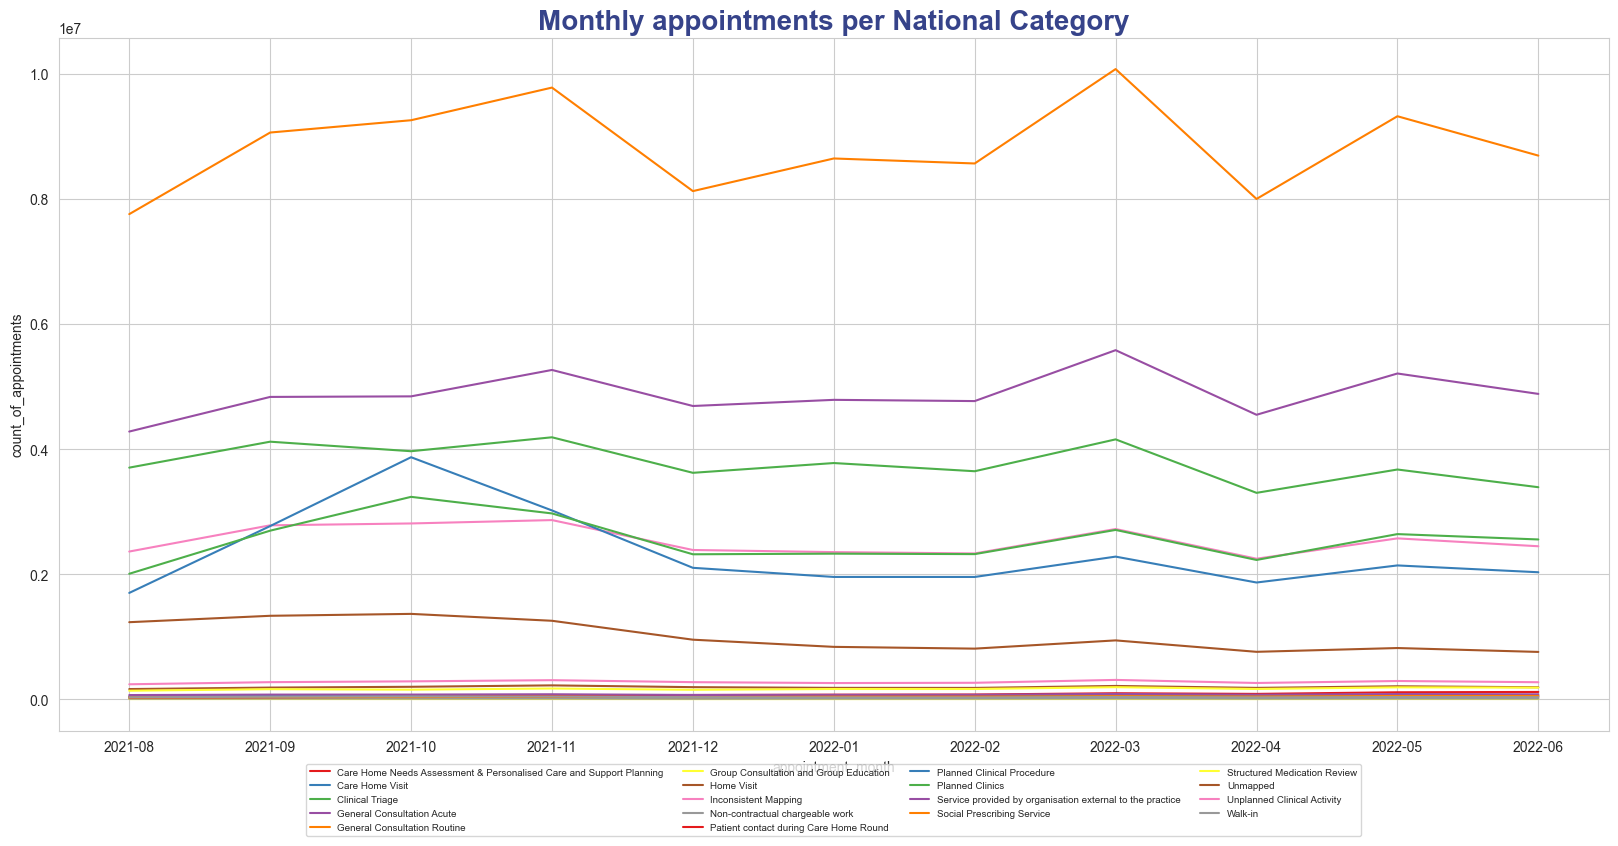

In [40]:
plt.figure(figsize=(20,9))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data=ctgs_per_month, hue='national_category', palette='Set1').set_title('Monthly appointments per National Category', fontsize=20, fontweight='bold', color='#36438A', fontfamily='arial')
plt.legend(bbox_to_anchor=(0.5, -0.1),fontsize=7, ncol=4, loc='center')

As per this visualisation, it's become clear chart, the most in demand categories are
- General Consultation Routine
- General Consultation Acute
- Clinical Triage

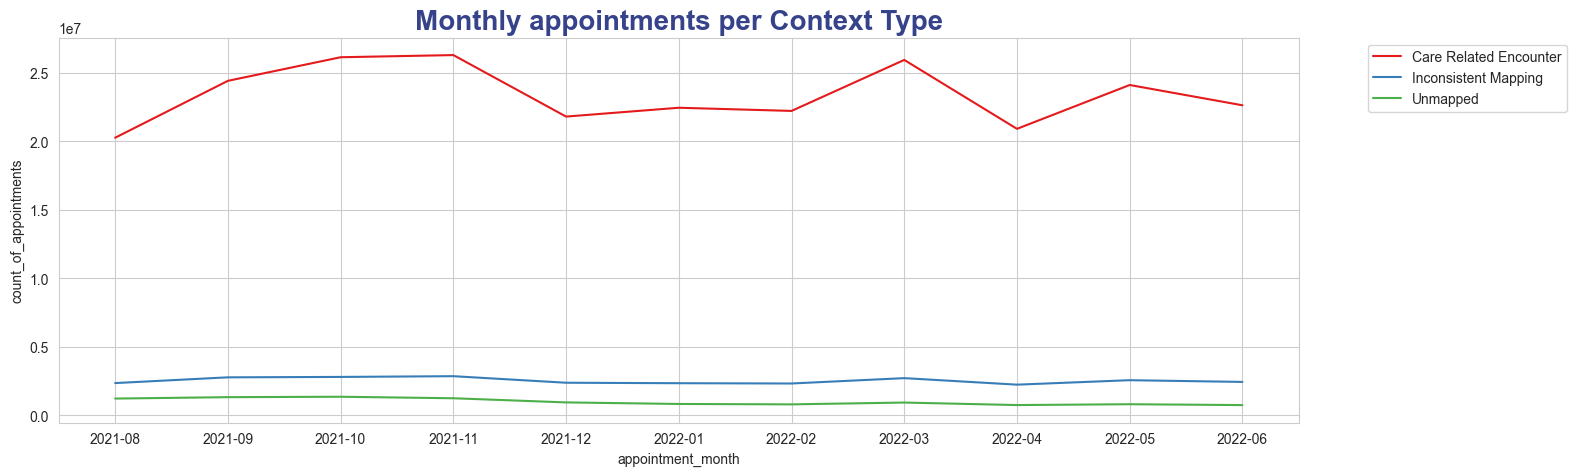

In [41]:
plt.figure(figsize=(16,5))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data=ctypes_per_month, hue='context_type', palette='Set1').set_title('Monthly appointments per Context Type', fontsize=20, fontweight='bold', color='#36438A', fontfamily='arial')
plt.legend(bbox_to_anchor=(1.05, 1),fontsize=10)

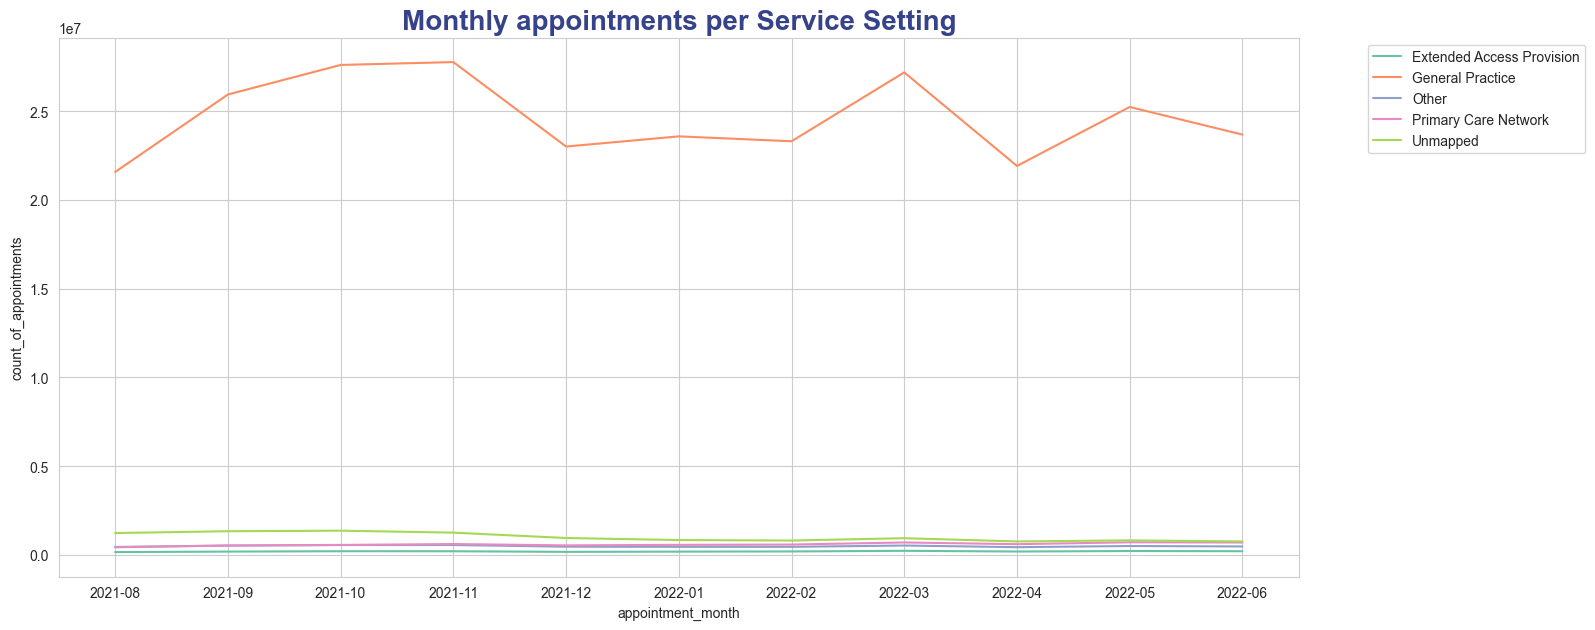

In [42]:
plt.figure(figsize=(16,7))
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data=services_per_month, hue='service_setting', palette='Set2').set_title('Monthly appointments per Service Setting', fontsize=20, fontweight='bold', color='#36438A', fontfamily='arial')
plt.legend(bbox_to_anchor=(1.05, 1),fontsize=10)

#### Now let's see the total number of the appointments per all 3 data sets

In [43]:
#count the sum of all appt records in National category
nat_cat_total_appts = categories.groupby(['appointment_month']) ['count_of_appointments'].sum().reset_index()
nat_cat_total_appts.head()

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776


Text(0.5, 1.0, 'Total  Number of Appointments per Month')

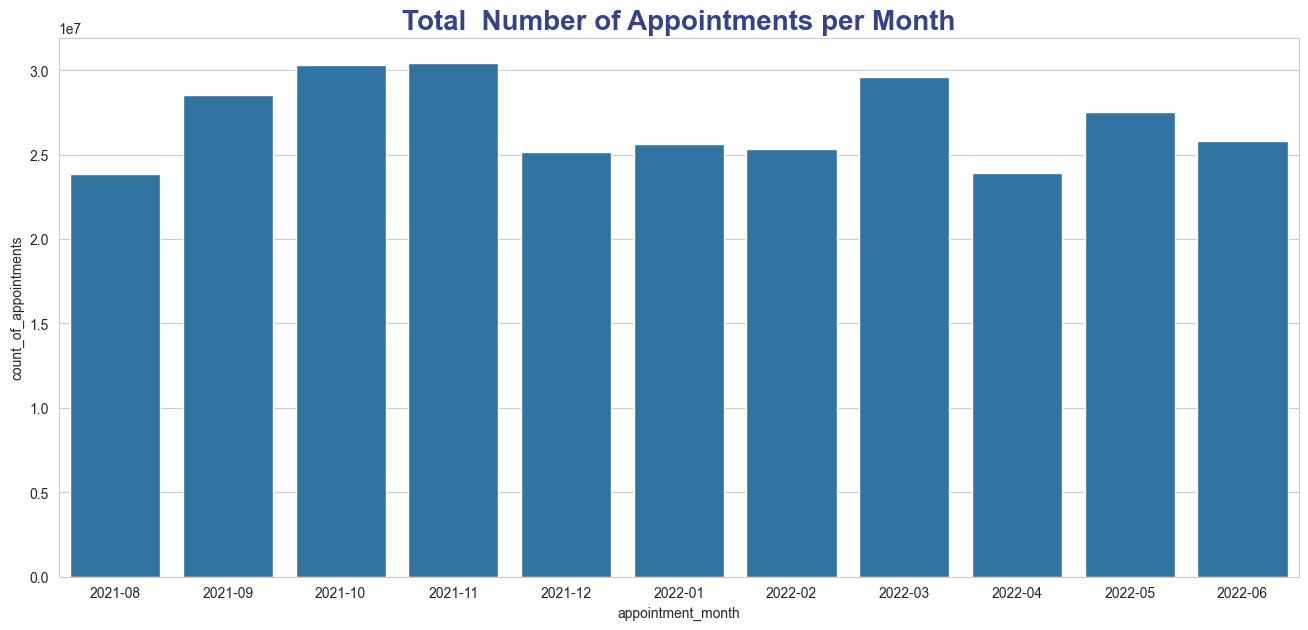

In [44]:
plt.figure(figsize=(16,7))
sns.barplot(x = 'appointment_month', y = 'count_of_appointments', data=nat_cat_total_appts).set_title('Total  Number of Appointments per Month', fontsize=20, fontweight='bold', color='#36438A', fontfamily='arial')

If we look at the chart, we'll see that the amount of appointments rises in October - November and in March and May.

In [45]:
appts_reg_total = appts_regional.groupby(['appointment_month']) ['count_of_appointments'].sum().reset_index()
appts_reg_total.head()

,appointment_month,count_of_appointments
0,2020-01-01,27199296
1,2020-02-01,24104621
2,2020-03-01,24053468
3,2020-04-01,16007881
4,2020-05-01,16417212


As we can see from the chart, the General Practice or GP Service is in very high demand.
Let's investigate the appointments and try to answer the following questions:
* Is there a common pattern in regard to appointment duration?
* Is there  common pattern between type of appointment and time between book and visiting a doctor?
* How does the missed appointments look like by type / month?
* The last, but not least, we will see the total number of appointments per month